## Wrangle and Analyze Data From WeRateDogs Twitter

### Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
    - [Quality](#quality)
    - [Tidiness](#tidiness)
- [Cleaning Data](#cleaning)
- [Storing, Analyzing and Visualizing](#visualizing)


<a id='intro'></a>
### Introduction

In this project, I showed what I learned in Data Wrangling section of Udacity Data Analyst Nanodegree program.The dataset that is wrangled (and analyzed and visualized)is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

### Gathering Data

Gathering process includes three parts for this project.

**1) The WeRateDogs Twitter archive file:** twitter_archive_enhanced.csv

**2) The tweet image prediction file:** This file will be downloaded using using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

**3) Twitter API and JSON file:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
#import all library that I will use 
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

**1. Gathering the Twitter archive csv file**

In [2]:
#read twitter archive csv file
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2) Gathering the tweet image prediction file**

In [4]:
#download tsv file programmatically using url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)


with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )


In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**3) Twitter API and JSON**

In [7]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

import os.path

- **Note:** I decided to create a file to store my tweet_json data. Because using the Twitter API that takes nearly 30 minutes every time. Therefore, I stored this data in a file, if the file does not exist, I will send a request to the Twitter API.


In [8]:
#check the tweet_json_data file 
#if the file is found use it, if it doesn't exist use the Twitter API
if os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', encoding='utf-8') as json_file:  
        all_data = json.load(json_file)


else:
    consumer_key = 'YOUR API KEY'
    consumer_secret = 'YOUR API SECRET'
    access_token = 'YOUR ACCESS TOKEN'
    access_secret = 'YOUR ACCESS SECRET'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)



    #Download Tweepy status object based on Tweet ID and store in list
    list_of_tweets = []
    # Tweets that can't be found are saved in the list below:
    cant_find_tweets_for_those_ids = []

    start = timer()
    for tweet_id in twitter_archive['tweet_id']:   
        try:
            list_of_tweets.append(api.get_status(tweet_id))
        except Exception as e:
            cant_find_tweets_for_those_ids.append(tweet_id)

    end = timer()
    print(end - start)
    
    print("The list of tweets" ,len(list_of_tweets))
    print("The list of not found tweets" ,len(cant_find_tweets_for_those_ids))
    
    #in this code block we isolate the json part of each tweepy status object
    #that we have downloaded and we add them all into a list.
    my_list_of_dicts = []
    for each_json_tweet in list_of_tweets:
        my_list_of_dicts.append(each_json_tweet)
        
    #write the list into a txt file
    with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
    
    

In [9]:
print("The list of tweets" ,len(all_data))

The list of tweets 2331


In [10]:
#create a DataFrame from the tweet_json.txt file

my_demo_list = []
for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])
        

In [11]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
621,793256262322548741,20544,8603,Tue Nov 01 01:00:05 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/BNy9IIJMb0
1134,724049859469295616,4326,1772,Sun Apr 24 01:38:33 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/XTsZTgilnT
2218,667902449697558528,828,363,Sat Nov 21 03:08:47 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/sJeHdGUt0W
829,765669560888528897,5275,1243,Tue Aug 16 22:00:23 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/t6RvnVEdRR
1459,693262851218264065,2229,500,Sat Jan 30 02:41:58 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/DYUsHtL2aR


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
created_at          2331 non-null object
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


### Assessing Data

**1) Visual Assessment**

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- **tweet_id** is the last part of the tweet URL after "status/" 
- **p1** is the algorithm's **#1 prediction** for the image in the tweet 
- **p1_conf** is how confident the algorithm is in its #1 prediction 
- **p1_dog** is whether or not the **#1 prediction** is a breed of dog 
- **p2** is the algorithm's second most likely prediction 
- **p2_conf** is how confident the algorithm is in its #2 prediction 
- **p2_dog** is whether or not the **#2 prediction** is a breed of dog 
- **p3** is the algorithm's third most likely prediction
- **p3_conf** is how confident the algorithm is in its #3 prediction 
- **p3_dog** is whether or not the **#3 prediction** is a breed of dog

In [15]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,36426,7747,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,31394,5740,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23652,3799,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39760,7913,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37969,8540,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19108,2858,Sat Jul 29 00:08:17 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11131,1866,Fri Jul 28 16:27:12 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,61430,17297,Fri Jul 28 00:22:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,26312,3939,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,30074,6736,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


**2) Programmatic Assessment**

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
sum(twitter_archive.tweet_id.duplicated())

0

In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Daisy          7
Buddy          7
Toby           7
Bailey         7
Bella          6
Oscar          6
Rusty          6
Milo           6
Scout          6
Jack           6
Leo            6
Jax            6
Dave           6
Stanley        6
Koda           6
Alfie          5
            ... 
Autumn         1
Maude          1
Crouton        1
Kulet          1
Ulysses        1
Billy          1
Schnitzel      1
Rodman         1
Lipton         1
Torque         1
Jiminus        1
Arlo           1
Severus        1
Barney         1
Meera          1
Pupcasso       1
Jaspers        1
Beckham        1
Walker         1
Harrison       1
Mac            1
Reagan         1
Jennifur       1
Oreo           1
Doobert        1
Kirk           1
Pumpkin        1
Champ         

In [21]:
# View descriptive statistics of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
sum(image_prediction.jpg_url.duplicated())

66

In [25]:
#list the rows that includes duplicate jpg_url
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [26]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

### Quality

#### twitter_archive :

- Missing data in following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,      retweeted_status_timestamp and expanded_urls. 
- Name column have invalid names such as;'None', 'a', 'an', 'the', 'by' and less than 3 characters.
- There are some different denominator rates than 10.
- Timestamp column type is an object.
- The numerator and denominator columns have invalid values.

#### image_prediction :

- There are some duplicate rows that they has the same jpg_url.
- There is no standardize for dogs names in p1, p2 and p3 columns.  

#### tweet_json:

- This dataset contains retweets. (keep only original data.)
- Convert the tweet_id data type to a integer to merge all there datasets.

### Tidiness

#### twitter_archive :

- doggo, floofer, pupper and puppo columns keep the same information. This columns should merge to one column like 'dogs_stage'.

- tweet_json and image_prediction datasets should be parts of the twitter_archive dataset.



### Cleaning Data

In [27]:
# create copy dataframes for all three datasets
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

#### 1. Define

Drop the retweets in twitter_archive dataset.

#### Code

In [28]:
#twitter_archive dataset contains retweet data
#retweets data contains retweeted_status_id and retweeted_status_user_id information.

twitter_archive_clean.query('retweeted_status_user_id != "NaN"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [29]:
#drop the retweets in twitter_archive dataset

twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_user_id)]

#### Test

In [30]:
twitter_archive_clean.query('retweeted_status_user_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 2. Define

- Drop the following columns that will not be used for analysis: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [31]:
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                  'in_reply_to_status_id',
                                                  'in_reply_to_user_id',
                                                  'retweeted_status_id',
                                                  'retweeted_status_user_id',
                                                  'retweeted_status_timestamp'], axis=1)


#### Test

In [32]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 3. Define

Melt the doggo, flooper, pupper and puppo columns to the dogs and dog_stage columns. Then drop the dogs column.

#### Code

In [33]:
#melt the four columns 
twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                id_vars=['tweet_id', 
                                         'timestamp', 
                                         'text', 
                                         'expanded_urls',
                                         'rating_numerator',
                                         'rating_denominator', 
                                         'name'],
                                var_name='dogs', value_name='dogs_stage')

#drop the dogs column
twitter_archive_clean = twitter_archive_clean.drop('dogs', axis=1)



In [34]:
#Sort by dogs_stage then drop duplicated based on tweet_id except the last 
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### Test

In [35]:
twitter_archive_clean.dogs_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

#### 4. Define


- Convert the tweet_id data type to an integer in tweet_json dataframe.

#### Code

In [36]:
# check tweet_id data type 
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
created_at          2331 non-null object
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


In [37]:
# convert tweet_id data type to int 
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#### Test

In [38]:
#confirm the result
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2331 non-null int64
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
created_at          2331 non-null object
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(3), object(4)
memory usage: 127.6+ KB


#### 5. Define

- Convert the 'timestamp' column type to a datetime in twitter_archive dataset.

#### Code

In [39]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp']) 

#### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dogs_stage            2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 152.9+ KB


#### 6. Define

Create new two columns to keep dog predictions and confident levels. Afterward, drop the unnecessary columns in image_prediction dataset.

#### Code

In [41]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
#creating two empty list to store dog predictions and confident levels 
dog_prediction = []
dog_conf_level = []

def prediction (df):
    if df['p1_dog'] == True:
        dog_prediction.append(df['p1'])
        dog_conf_level.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_prediction.append(df['p2'])
        dog_conf_level.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_prediction.append(df['p3'])
        dog_conf_level.append(df['p3_conf'])
    else:
        dog_prediction.append('Error')
        dog_conf_level.append('Error')
            
#call the prediction function            
image_prediction_clean.apply(prediction, axis=1)


# keep the dog_prediction and dog_conf_level lists to two columns
image_prediction_clean['dog_prediction'] = dog_prediction
image_prediction_clean['dog_conf_level'] = dog_conf_level   

In [43]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_prediction'] != 'Error']


In [44]:
#drop the unnecessary columns
image_prediction_clean.drop(['p1', 'p1_conf', 'p1_dog', 
                             'p2', 'p2_conf', 'p2_dog', 
                             'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#### Test

In [45]:
image_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,dog_prediction,dog_conf_level
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655
1597,799063482566066176,https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg,2,Norfolk_terrier,0.334436
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.71951
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,vizsla,8.10632e-05
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.99672
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231


#### 7. Define

- Standardize the numerator rates.
- Five rows include wrong numerator rates, that should be fixed first.
- Some images include group dogs and their rates fit with their number. Therefore, I will create a new rate column and fill this column with calculated rates.

#### Code

In [46]:
#update some numerators that contains wrong rates

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.50
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [47]:
#some group dogs
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
                                    [['tweet_id',
                                      'text',
                                      'rating_numerator',
                                    'rating_denominator']])



,tweet_id,text,rating_numerator,rating_denominator
2154,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130
3659,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20.0,16
3658,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11
3594,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50


In [48]:
# print the link to see the image 
print(twitter_archive_clean.query('tweet_id == 677716515794329600')['expanded_urls'])


3775    https://twitter.com/dog_rates/status/677716515...
Name: expanded_urls, dtype: object


In [49]:
#show image using the image url 
#this image for tweet_id = 677716515794329600
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CWe7kw9W4AE8UJh?format=jpg&name=medium')

In [50]:
twitter_archive_clean['rates'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)


In [51]:
# convert the data type to a float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)


#### Test

In [52]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage,rates
2784,778764940568104960,2016-09-22 01:16:45,Oh my god it's Narcos but Barkos. 13/10 someon...,https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...,13.0,10.0,None,None,13.0
2143,666421158376562688,2015-11-17 01:02:40,*internally screaming* 12/10 https://t.co/YMcr...,https://twitter.com/dog_rates/status/666421158...,12.0,10.0,None,None,12.0
2820,772877495989305348,2016-09-05 19:22:09,You need to watch these two doggos argue throu...,https://twitter.com/dog_rates/status/772877495...,11.0,10.0,None,None,11.0
5742,687704180304273409,2016-01-14 18:33:48,Say hello to Blakely. He thinks that's a hat. ...,https://twitter.com/dog_rates/status/687704180...,9.0,10.0,Blakely,pupper,9.0
3741,679148763231985668,2015-12-22 03:57:37,I know everyone's excited for Christmas but th...,https://twitter.com/dog_rates/status/679148763...,8.0,10.0,None,None,8.0


In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dogs_stage            2175 non-null object
rates                 2175 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 169.9+ KB


In [54]:
twitter_archive_clean.rates.value_counts()

12.000000      504
10.000000      444
11.000000      431
13.000000      307
9.000000       156
8.000000        98
7.000000        53
14.000000       43
5.000000        35
6.000000        32
3.000000        19
4.000000        15
2.000000        11
1.000000         7
0.000000         2
420.000000       2
17.000000        1
182.000000       1
6.363636         1
9.500000         1
12.500000        1
15.000000        1
inf              1
11.260000        1
11.270000        1
8.181818         1
666.000000       1
7.333333         1
34.285714        1
9.750000         1
1776.000000      1
13.500000        1
Name: rates, dtype: int64

In [55]:
#confirm the group dogs rate
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
                                    [['tweet_id',
                                      'text',
                                      'rating_numerator',
                                    'rating_denominator',
                                     'rates']])

,tweet_id,text,rating_numerator,rating_denominator,rates
2154,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1.0,2.0,5.000000
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0,11.000000
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0,11.000000
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0,11.000000
3659,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20.0,16.0,12.500000
3658,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0,6.363636
3594,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0,2.000000
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0,10.000000
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0,11.000000
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,9.000000


#### 8. Define

Keep the original tweets only. This dataset should not contain retweet information.

#### Code

In [56]:
#check the values for retweeted_status column
tweet_json_clean.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [57]:
#keep the original tweets only

tweet_json_clean = tweet_json_clean.query('retweeted_status == "Original tweet"')

#### Test

In [58]:
#confirm the code is worked
tweet_json_clean.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

#### 9. Define

Drop the duplicates for jpg_url in image_prediction dataset.

#### Code

In [59]:
#check count of duplicates
sum(image_prediction_clean.jpg_url.duplicated())

60

In [60]:
image_prediction_clean.jpg_url.drop_duplicates(inplace=True)

#### Test

In [61]:
sum(image_prediction_clean.jpg_url.duplicated())

0

#### 10. Define

In twitter_archive dataset, name column contains some invalid names such as;'None', 'a', 'an', 'old', 'the', 'by' etc. Some of them contain less than 3 characters and some of them start with a lower letter. First, we will check the names that start with a lower letter, afterwards we will replace them to null.

#### Code

In [62]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter_archive_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['a', 'an', 'the', 'quite', 'such', 'getting', 'infuriating', 'old', 'very', 'actually', 'space', 'just', 'light', 'by', 'officially', 'life', 'incredibly', 'one', 'not', 'this', 'unacceptable', 'my', 'his', 'mad', 'all']


In [63]:
#replace the name to None 
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

In [64]:
# Replace all 'None's with a NaN
twitter_archive_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

#### Test

In [65]:
twitter_archive_clean.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Lola         8
Winston      8
Sadie        8
Toby         7
Daisy        7
Stanley      6
Bella        6
Oscar        6
Bailey       6
Jax          6
Koda         6
Bo           6
Chester      5
Rusty        5
Scout        5
Leo          5
Dave         5
Milo         5
Louis        5
Buddy        5
Bentley      5
Oakley       4
Reggie       4
Boomer       4
            ..
Julius       1
Stu          1
Jerome       1
Sully        1
Baron        1
Harrison     1
Walker       1
Beckham      1
Baloo        1
Tater        1
Lacy         1
Ole          1
Cali         1
Ron          1
Angel        1
Mairi        1
Lilah        1
Emmie        1
Jameson      1
Pupcasso     1
Bronte       1
Traviss      1
Jarod        1
Jiminus      1
Arlo         1
Severus      1
Barney       1
Meera        1
Jomathan     1
Jay          1
Name: name, Length: 930, dtype: int64

#### 11. Define

Merge all three data frames using merge function, but before join all there of them, tweet_id data type in tweet_json_clean data frames that should convert to an integer.

#### Code

In [66]:
#merge all datasets
from functools import reduce

dfs = [twitter_archive_clean, image_prediction_clean, tweet_json_clean]
df_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

#### Test

In [67]:
list(df_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'rates',
 'jpg_url',
 'img_num',
 'dog_prediction',
 'dog_conf_level',
 'favorite_count',
 'retweet_count',
 'created_at',
 'source',
 'retweeted_status',
 'url']

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1678
Data columns (total 19 columns):
tweet_id              1679 non-null int64
timestamp             1679 non-null datetime64[ns]
text                  1679 non-null object
expanded_urls         1679 non-null object
rating_numerator      1679 non-null float64
rating_denominator    1679 non-null float64
name                  1180 non-null object
dogs_stage            1679 non-null object
rates                 1679 non-null float64
jpg_url               1679 non-null object
img_num               1679 non-null int64
dog_prediction        1679 non-null object
dog_conf_level        1679 non-null object
favorite_count        1679 non-null int64
retweet_count         1679 non-null int64
created_at            1679 non-null object
source                1679 non-null object
retweeted_status      1679 non-null object
url                   1679 non-null object
dtypes: datetime64[ns](1), float64(3), int64(4), object(11)
memory us

### Storing, Analyzing, and Visualizing Data

In [69]:
#store the clean data to a csv file

df_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

**1) Which names are the most popular?**

In [70]:
df_clean.name.value_counts()

Cooper      10
Lucy         9
Oliver       9
Tucker       9
Charlie      9
Penny        8
Winston      7
Sadie        7
Daisy        7
Koda         6
Toby         6
Lola         6
Jax          6
Bo           5
Oscar        5
Bella        5
Stanley      5
Leo          5
Rusty        5
Dexter       4
Duke         4
Brody        4
Alfie        4
Maggie       4
Bailey       4
Dave         4
Louis        4
Gus          4
Finn         4
Bear         4
            ..
Mac          1
Nollie       1
Oreo         1
Doobert      1
Kirk         1
Gromit       1
Skittles     1
Emmie        1
Mairi        1
Livvie       1
Crouton      1
CeCe         1
Ridley       1
Grady        1
Tuck         1
Erik         1
Bruiser      1
Tessa        1
Nida         1
Bubba        1
Sampson      1
Stormy       1
Zoe          1
Tater        1
Lacy         1
Ole          1
Cali         1
Ron          1
Angel        1
Jay          1
Name: name, Length: 831, dtype: int64

Text(0,0.5,'Count')

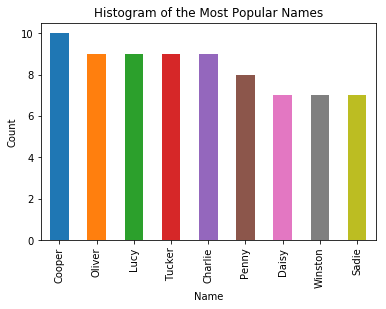

In [71]:
popular_name = df_clean.groupby('name').filter(lambda x: len(x) >= 7)

popular_name['name'].value_counts().plot(kind = 'bar')
plt.title('Histogram of the Most Popular Names')
plt.xlabel('Name')
plt.ylabel('Count')

- Cooper, Tucker, Oliver, Charlie, and Lucy are the top 5 preferable names for dogs.       

**2) What is the correlation between retweet and favorite counts?**

In [72]:
col_1 = df_clean["retweet_count"]
col_2 = df_clean["favorite_count"]
corr_1 = col_1.corr(col_2)

print("Correlation Between Retweet Count And Favorite Count : ", corr_1)

Correlation Between Retweet Count And Favorite Count :  0.931003922309


- There is a positive correlation between retweet_count and favorite_count columns. This mean they have a relationship in the same direction. When favorite_count variable decreases as the retweet_count variable decreases, or favorite_count variable increases while the retweet_count increases.

Text(0,0.5,'Favorite')

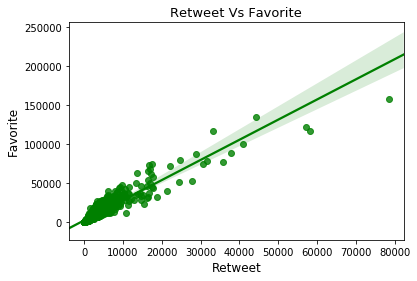

In [73]:
import seaborn as sns

#make regplot which shows correlation between retweet_count and favorite_count
ax = sns.regplot(x=df_clean['retweet_count'], y=df_clean['favorite_count'],color='g')

#setup the title and the labels of the scatter plot.
ax.set_title("Retweet Vs Favorite",fontsize=13)
ax.set_xlabel("Retweet",fontsize=12)
ax.set_ylabel("Favorite",fontsize=12)

**3) What are the most popular dog types?**

In [74]:
df_clean.dog_prediction.value_counts()

golden_retriever               158
Labrador_retriever             106
Pembroke                        95
Chihuahua                       91
pug                             62
toy_poodle                      50
chow                            48
Pomeranian                      42
Samoyed                         41
malamute                        33
Chesapeake_Bay_retriever        31
cocker_spaniel                  30
French_bulldog                  30
miniature_pinscher              25
Eskimo_dog                      22
Cardigan                        21
German_shepherd                 21
beagle                          20
Staffordshire_bullterrier       20
Siberian_husky                  20
Shih-Tzu                        20
Maltese_dog                     19
Shetland_sheepdog               19
Rottweiler                      19
Lakeland_terrier                18
kuvasz                          18
basset                          17
Italian_greyhound               17
West_Highland_white_

In [75]:
#take the dog types with counts higher than 30
popular_types = df_clean.groupby('dog_prediction').filter(lambda x: len(x) >= 30)
popular_types.dog_prediction.value_counts()

golden_retriever            158
Labrador_retriever          106
Pembroke                     95
Chihuahua                    91
pug                          62
toy_poodle                   50
chow                         48
Pomeranian                   42
Samoyed                      41
malamute                     33
Chesapeake_Bay_retriever     31
French_bulldog               30
cocker_spaniel               30
Name: dog_prediction, dtype: int64

Text(0.5,1,'Histogram of the Most Popular Types')

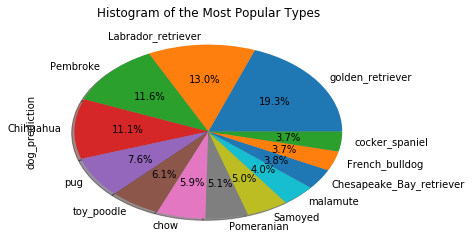

In [76]:
popular_types['dog_prediction'].value_counts().plot(kind='pie',
                                                 subplots=True,
                                                 autopct='%1.1f%%',
                                                 shadow=True)

plt.title('Histogram of the Most Popular Types')


- The most popular dog type is a Golden Retriever and the following types are Labrador retriever, Pembroke, Chihuahua and Pug.

**4) What is the relationship between retweet count and rates?**

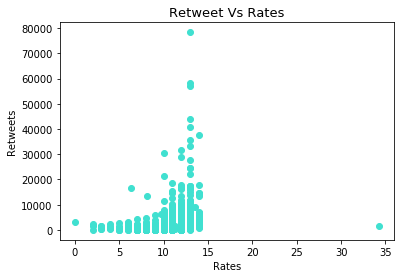

In [77]:
#scatter plot, it shows correleation between retweet_count and rates columns
plt.scatter(df_clean["rates"], df_clean["retweet_count"], color= 'turquoise')
plt.title("Retweet Vs Rates",fontsize=13)
plt.xlabel("Rates")
plt.ylabel("Retweets")
plt.show()

###  References

- https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o